[View in Colaboratory](https://colab.research.google.com/github/connected-bsamadi/awesome-wiki/blob/master/Most_Commonly_Used_License_Types_on_GitHub.ipynb)

# Introduction
In this notebook, license types are sorted based on the number of corresponding files on the [GitHub public dataset](https://www.kaggle.com/github/github-repos). The result is visualized using a [Seaborn](https://seaborn.pydata.org/) bar plot. 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from google.cloud import bigquery

project_id = 'ontario-2018'
client = bigquery.Client(project=project_id)

In [0]:
query = ('''
-- Select all the columns we want in our joined table
        SELECT L.license, COUNT(sf.path) AS number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` as sf
        -- Table to merge into sample_files
        INNER JOIN `bigquery-public-data.github_repos.licenses` as L 
            ON sf.repo_name = L.repo_name -- what columns should we join on?
        GROUP BY L.license
        ORDER BY number_of_files DESC
  ''')
query_job = client.query(query)  # API request - starts the query


In [0]:
file_count_by_license = query_job.to_dataframe()
file_count_by_license['license_names'] = pd.Series(['MIT',
                                                    'GNU General Public License v2.0', 
                                                    'Apache license 2.0', 
                                                    'GNU General Public License v3.0', 
                                                    'BSD 3-clause "New" or "Revised" license', 
                                                    'GNU Affero General Public License v3.0', 
                                                    'GNU Lesser General Public License v2.1', 
                                                    'BSD 2-clause "Simplified" license', 
                                                    'GNU Lesser General Public License v3.0', 
                                                    'Mozilla Public License 2.0', 
                                                    'Creative Commons Zero v1.0 Universal', 
                                                    'Eclipse Public License 1.0', 
                                                    'The Unlicense', 
                                                    'Artistic license 2.0', 
                                                    'ISC' ], index=file_count_by_license.index)
file_count_by_license.loc[:,'number_of_files'] *= 1e-7

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


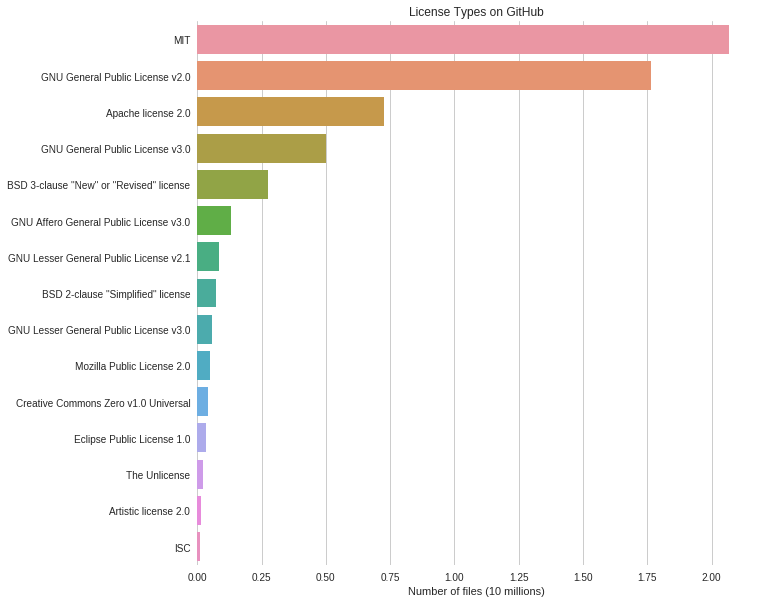

In [0]:
# Visualizing with Seaborn
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="number_of_files", y="license_names", data=file_count_by_license, ci=None)

# Add informative axis labels
ax.set(ylabel="", xlabel="Number of files (10 millions)", title="License Types on GitHub")
sns.despine(left=True, bottom=True)